In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io   
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
MEF = np.array(pd.read_csv ('../data/processed_data/MEF.csv'))
y = np.array(MEF[:,-1],dtype=int)
MEF = MEF[:,0:-1]

In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(MEF,y)

In [5]:
print(MEF.shape, len(pred))
acc = model.score_
print(acc)

(793, 10322) 793
0.6958041958041958


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (199, 87, 2.2873563218390807, 0.9045454545454545, 0.9993990965727784, 0.6958041958041958, 0.9998548881948092, 0.3041958041958042, 0.09545454545454546)


# Mutual information maximizer (MIM)

test 0.9698959644576082 0.020163288678178258
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (337, 19, 17.736842105263158, 0.9853801169590644, 0.9998776009791922, 0.9466292134831461, 0.9999677868261004, 0.05337078651685393, 0.014619883040935672)


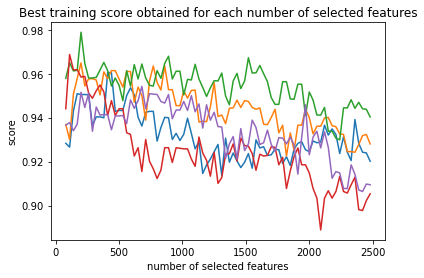

In [7]:
#Define parameters for MIM method
N = np.arange(80,2500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,MEF, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = MEF[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

In [8]:
get_best_genes_names(subset, '../data/processed_data/MEFgenes_interest.csv', '../data/optimized_subsets/MEFgenes_bestMIM.csv')

# Anova F test

test 0.9861851143058938 0.008786244457089185
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (350, 11, 31.818181818181817, 0.9915014164305949, 0.9999293054582613, 0.9695290858725761, 0.999980718679101, 0.030470914127423823, 0.0084985835694051)


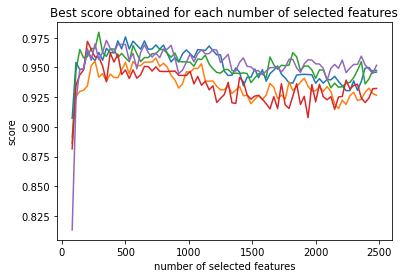

In [9]:
#Define parameters for ANOVA method
N = np.arange(80,2500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,MEF, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = MEF[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

In [10]:
get_best_genes_names(subset, '../data/processed_data/MEFgenes_interest.csv', '../data/optimized_subsets/MEFgenes_bestANOVA.csv')

# Hybrid methods

# Mutual information and stimulated annealing

In [ ]:
#Define parameters for MI + stimulated annealing method
N = np.array([800])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,MEF, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = MEF[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([800])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,MEF, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = MEF[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 